If you have a series of objects, each with 10 units, and a win/lose transaction occurs where 1 unit is traded between the winner and loser, how many transactions will it take for all units to converge into the possession of one object? If you run this 1000 times, will the distribution be normal?


In [1]:
import random
import matplotlib.pyplot as plot
import numpy as np
from scipy.stats import skew
from scipy.stats import skewtest

In [2]:
units_per_object = 10
iterations = 1000

In [3]:
count_list = []

for i in range(iterations):

    a = b = c = d = e = f = g = h = i = j = units_per_object
    lista = [a, b, c, d, e, f, g, h, i, j]
    big_count = 0

    while max(lista)-min(lista) != units_per_object * len(lista):        
        x = y = m = n = 0

        choice = []
        for i, v in enumerate(lista):
            if lista[i] == 0:
                pass
            else:
                choice.append(i)

        while x == y: # ensure x, y assinged and not the same
            x = random.choice(choice)
            y = random.choice(choice)
        while m == n: # ensure m, n assinged and not the same
            m = random.randint(1, 1000000)
            n = random.randint(1, 1000000)

        if m > n: # run the test, assign a winner and loser
            lista[x] += 1
            lista[y] -= 1
        else:
            lista[x] -= 1
            lista[y] += 1

        big_count += 1

    count_list.append(big_count)


min = 767, mean = 4545.335, median = 3960.5, max = 15764, skewness = 1.4814


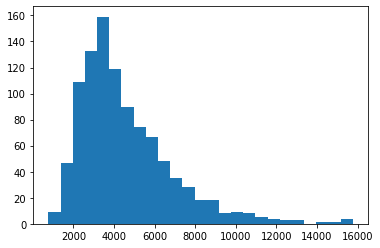

In [4]:
mean = np.mean(count_list)
median = np.median(count_list)
max = np.max(count_list)
min = np.min(count_list)
skewness = skew(count_list)
print(f'{min = }, {mean = }, {median = }, {max = }, {skewness = :.4f}')

plot.hist(count_list, 25)
plot.show()
